# Actividad 3: Descubrimiento de Petróleo

## Contexto
El petróleo es una mezcla homogénea[...]

## Indicaciones

Realice el Análisis Discriminante de los datos proporcionados y redacte un reporte sobre los principales hallazgos. El reporte debe contener los siguientes elementos:

1) Definir de forma clara el objetivo del estudio que estaría realizando.

2) Realizar un análisis descriptivo de los tres tipos de crudo que se encuentran registrados en la base de datos. ¿Se puede inferir que hay diferencias entre los tipos de crudo en cuanto a las mediciones de las variables bajo estudio? Justifique la respuesta 

In [1]:
library(readxl)
# Para listar las hojas que hay:
#excel_sheets(path="datasets/Petroleo.xlsx")

petroleos <- suppressMessages(read_excel("datasets/Petroleo.xlsx", sheet="Petroleo"))
# Cambiamos el nombre porque la primera columna se llama "...1"
colnames(petroleos)[1]<-"id"
head(petroleos, n=4)

id,Tipo,Vanadio,Fierro,Berilio,Saturados,Aromáticos
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AS1250015,1,3.9,7.141428,0.4472136,0.1416431,12.19
AS1250030,1,2.7,7.000000,0.2645751,0.1400560,12.23
AS1250048,1,2.8,6.000000,0.5477226,0.1428571,11.30
AS1250023,1,3.1,6.708204,0.2828427,0.1388889,13.01


In [2]:
as.matrix(ftable(petroleos[,-1]$Tipo))

1,2,3
7,11,38


_Vemos que hay 7 elementos de tipo 1, 11 tipo 2 y 38 del tipo 3._

_De lo anterior, se cree pertinente el hacer el análisis con los grupos 2 y 3 para el entrenamiento del modelo, y el grupo 1 para probarlo._

In [3]:
tipo_omitido <- 1

In [4]:
suppressMessages(library(dplyr))

for (tipos in c(1:3)){
    summary_petroleo <- petroleos[,-1] %>%
        filter(Tipo == tipos) %>%
        .[,-1] %>% # Eliminamos la columna tipo, porque no se necesita.
        summary()
    print(paste("-- Summary del petróleo tipo",tipos,"--"))
    print(as.matrix(summary_petroleo))    
}

[1] "-- Summary del petróleo tipo 1 --"
    Vanadio          Fierro         Berilio         Saturados     
 Min.   :2.700   Min.   :5.916   Min.   :0.0000   Min.   :0.1280  
 1st Qu.:2.750   1st Qu.:6.279   1st Qu.:0.2737   1st Qu.:0.1395  
 Median :3.100   Median :6.708   Median :0.3162   Median :0.1416  
 Mean   :3.229   Mean   :6.586   Mean   :0.3850   Mean   :0.1496  
 3rd Qu.:3.700   3rd Qu.:6.891   3rd Qu.:0.4975   3rd Qu.:0.1514  
 Max.   :3.900   Max.   :7.141   Max.   :0.8367   Max.   :0.1957  
   Aromáticos   
 Min.   : 9.00  
 1st Qu.:10.86  
 Median :12.19  
 Mean   :11.54  
 3rd Qu.:12.43  
 Max.   :13.01  
[1] "-- Summary del petróleo tipo 2 --"
    Vanadio          Fierro         Berilio         Saturados     
 Min.   :1.200   Min.   :3.464   Min.   :0.0000   Min.   :0.1081  
 1st Qu.:3.650   1st Qu.:5.567   1st Qu.:0.2646   1st Qu.:0.1371  
 Median :4.200   Median :5.916   Median :0.2646   Median :0.1616  
 Mean   :4.445   Mean   :5.667   Mean   :0.3440   Mean   :0.1571

_De los detalles de los elementos anteriores vemos que la categoría aromáticos tiene la mayor variación. Aunque, un gráfico de caja y bigotes ayudaría a ver las cosas más claras._

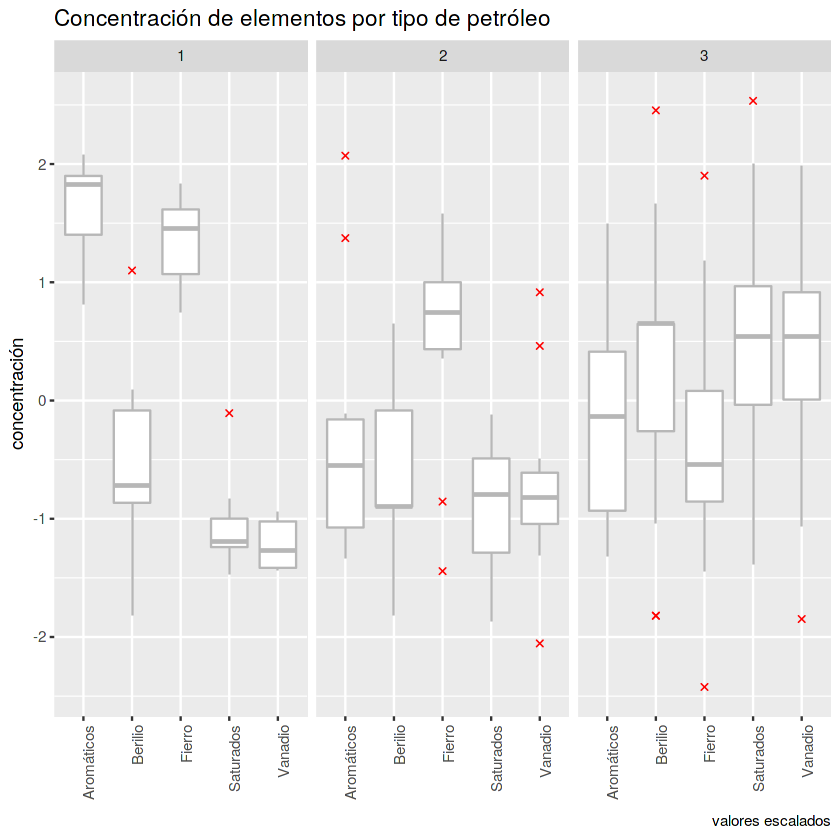

In [5]:
suppressMessages(library(dplyr))
library(tidyr)
suppressMessages(library(ggplot2))

petroleos_escalado <- as.data.frame(scale(petroleos[,-c(1,2)]))
petroleos_escalado$Tipo <- petroleos$Tipo

petroleos_escalado %>%
    #filter(Tipo != tipo_omitido) %>%    
    gather(key="elemento", value="valor", -c(Tipo)) %>%
    ggplot(data=.,aes(x=elemento, y=valor, label=Tipo))+
        geom_boxplot(
                color="#B7B7B7"
                ,outlier.colour = "red"
                ,outlier.shape = 4                
        )+
        labs(
            title = "Concentración de elementos por tipo de petróleo"            
            ,x = element_blank()
            ,y = "concentración"
            ,caption = "valores escalados"
        )+
        theme(axis.text.x = element_text(angle = 90, hjust = 1))+
    facet_grid(~Tipo)

_En el gráfico anterior podemos observar claramente que los tipos de petróleo tienen comportamientos diferentes y que también los outliers son distintos entre ambos tipos._

_Para asegurarnos de que tienen comportamiento distinto, hacemos un gráfico de densidad:_

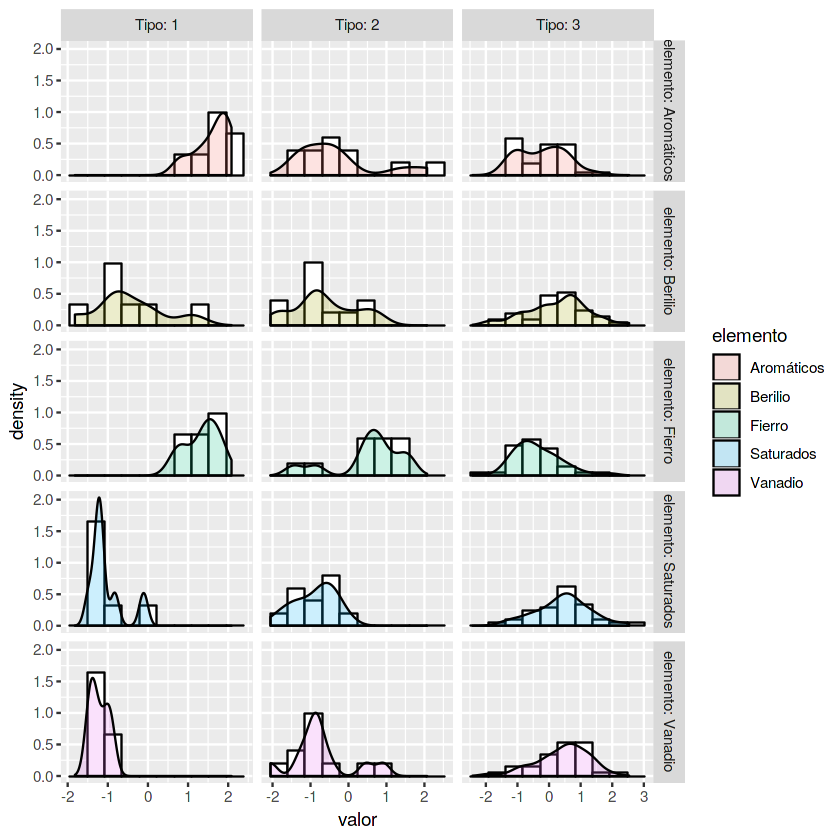

In [6]:
petroleos_escalado %>%
    #filter(Tipo != tipo_omitido) %>%    
    gather(key="elemento", value="valor", -c(Tipo)) %>%
    ggplot(aes(x=valor, fill=elemento))+
        # Le ponemos densidad en lugar de conteo
        geom_histogram(            
            aes(y=..density..), colour="black", fill="white", bins=10
        ) +
        geom_density(alpha=.2)+# , fill="#FF6666") +
        facet_grid(
            rows = vars(elemento),
            cols = vars(Tipo),
            labeller = label_both,
            #scale="free"
            scales="free_x",
            #switch = 'x'
        )

_Vemos que comparando elemento a elemento por tipo, tampoco hay algún par de elementos que se comporte igual._

_Ya que estamos en los gráficos, aprovechamos para ver los gráficos de dispersión por pares:_

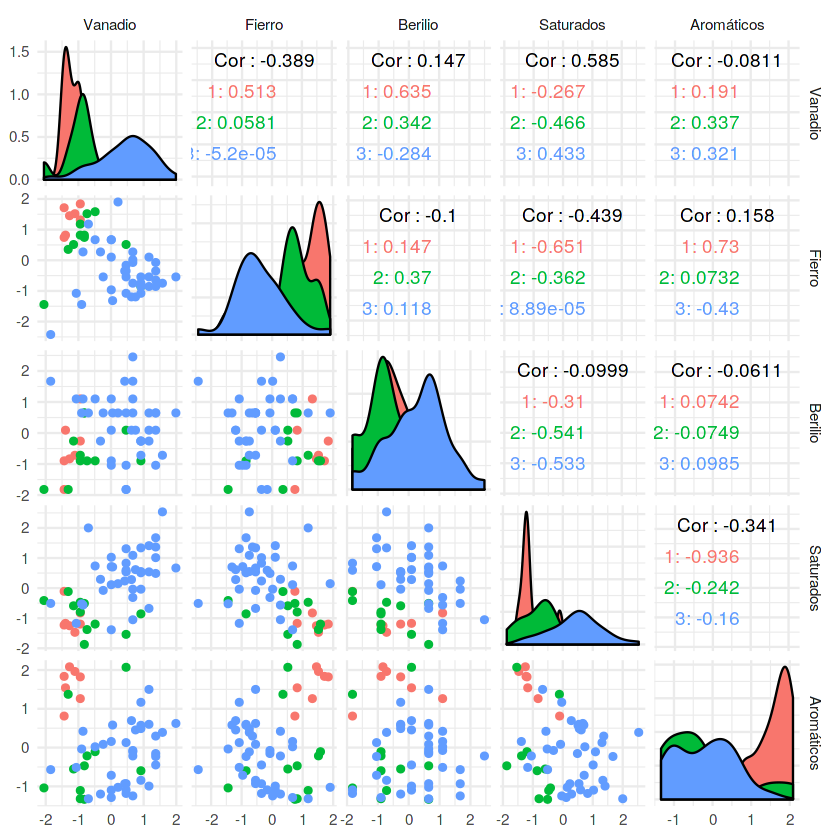

In [7]:
suppressMessages(library(GGally))

# Filtramos el tipo de petroleo 1
pares_petroleos<-petroleos_escalado
# Extraemos la columna Tipo, para colorear los pares
pares_petroleos_tipo<-as.character(pares_petroleos$Tipo)
# Mandamos la columna Tipo ALV
pares_petroleos$Tipo<-NULL

ggpairs(
    data = pares_petroleos
    #columns = colnames(petroleos_escalado),
    ,mapping = aes(color=pares_petroleos_tipo)
) + theme_minimal()

_Del gráfico anterior vemos que no hay ninguna correlación importante entre los elementos de los dos tipos de petróleo elegido._

3)  Se cumple con los supuestos para poder aplicar el método de Análisis Discriminante. Justifique su respuesta. Considere un nivel de significancia igual al 1\%.

 _Para poder aplicar el Análisis Discriminante se busca es que la hipótesis nula no sea rechazada, es decir, que el p–valor sea mayor al nivel de significancia seleccionado._
 
  - $H_0$: La muestra de valores $x_1, x_2, …, x_n$ proviene de una población normalmente distribuida.
  - $H_1$: La muestra de valores $x_1, x_2, …, x_n$ **NO** proviene de una población normalmente distribuida.

In [8]:
# Shapiro-Wilco:
#  - Se rechaza Ho si W es muy pequeño.
#  - W oscila entre 0-1
#  - Se rechaza Ho 
#    - Si p_value es menor que 1-(porcentaje confianza)
#    - Si p_value es menor que el nivel de significancia.

petroleos_escalado %>%
    #filter(Tipo != tipo_omitido) %>%    
    gather(key="elemento", value="valor", -c(Tipo)) %>%
    group_by(Tipo, elemento) %>%
    summarise_all(
        .funs = list(
            W = ~shapiro.test(valor)$statistic, 
            p_value = ~shapiro.test(valor)$p.value)            
    )%>%
    as.data.frame()


Tipo,elemento,W,p_value
<dbl>,<chr>,<dbl>,<dbl>
1,Aromáticos,0.9064236,0.37166575
1,Berilio,0.9637844,0.85046934
1,Fierro,0.9094109,0.39181018
1,Saturados,0.7953791,0.03686035
1,Vanadio,0.8444077,0.10917469
2,Aromáticos,0.8317424,0.02460898
2,Berilio,0.9064832,0.22145885
2,Fierro,0.8724700,0.08339299
2,Saturados,0.9506436,0.65218870


_El test de normalidad concluye que para la concentración de elementos, parece que los elementos Aromáticos de ambos tipos (2,3), Fierro en el tipo 2 y Saturados en el tipo 1, no provienen de una población normalmente distribuida. Se rechaza la hipótesis nula considerarando un nivel de significancia de 0.10._

_De los resultados se desprende que las variables predictoras en cada uno de los grupos **NO** cumplen con el supuesto de normalidad univariada._

 _Probemos de nuevo, pero ahora **eliminando** Aromáticos, Fierro y Saturados en los grupos._

In [9]:
petroleos_escalado %>%
    #filter(Tipo != tipo_omitido) %>%
    select(everything(),-c('Aromáticos', 'Fierro', 'Saturados')) %>%
    gather(key="elemento", value="valor", -c(Tipo)) %>%
    group_by(Tipo, elemento) %>%
    summarise_all(
        .funs = list(
            W = ~shapiro.test(valor)$statistic, 
            p_value = ~shapiro.test(valor)$p.value)            
    )%>%
    as.data.frame()

Tipo,elemento,W,p_value
<dbl>,<chr>,<dbl>,<dbl>
1,Berilio,0.9637844,0.8504693
1,Vanadio,0.8444077,0.1091747
2,Berilio,0.9064832,0.2214588
2,Vanadio,0.9071394,0.2255019
3,Berilio,0.9643674,0.2624079
3,Vanadio,0.9661233,0.2980818


_Al no saberse qué tanto impactaban estas variables al modelo, hacemos un análisis factorial ya que como vimos en el gráfico anterior, las correlaciones son bajas y se puede realizar el AF._

In [10]:
suppressMessages(library(psych))

petroleos_cor <- petroleos_escalado %>%
    #filter(Tipo != tipo_omitido) %>%
    select(everything(),-c(Tipo)) %>%
    cor()

petroleos_filtrado <- petroleos_escalado %>%
    #filter(Tipo != tipo_omitido) %>%
    select(everything(),-c(Tipo))

num_obs <- nrow(petroleos_filtrado)
cortest.bartlett(petroleos_cor, n=num_obs)$p.value

[1] 4.396251e-07

_Vemos que $\alpha$ es muy pequeño y podemos hacer el AF._

In [11]:
library(psych)
kmo_petroleos <- KMO(petroleos_filtrado)
kmo_petroleos$MSA

[1] 0.5382319

_El índice de KMO es bastante bajo. Probemos sin las variables que se eliminaron anteriormente_

In [12]:
kmo_petroleos <- petroleos_filtrado %>%
    select(everything(),-c('Aromáticos', 'Fierro', 'Saturados')) %>%
    KMO()

kmo_petroleos$MSA

[1] 0.5

_Vemos que efectivamente, el índice de KMO no empeora tanto. Aún así, hacemos el AF para todas las variables._

In [13]:
num_vars=ncol(petroleos_filtrado)
# Hello darkness my old friend...
fa_petroleos <- fa(
    petroleos_filtrado
    ,nfactors=num_vars    
    ,rotate="varimax"
    ,fm="mle"
    ,max.iter=256
)
fa_petroleos$Vaccounted[,1:4] #Porque al imprimirlo en PDF se corta :/
fa_petroleos$Vaccounted[,5]

,ML1,ML3,ML2,ML4
SS loadings,1.2480374,0.36197259,0.21378516,3.754255e-30
Proportion Var,0.2496075,0.07239452,0.04275703,7.508510e-31
Cumulative Var,0.2496075,0.32200201,0.36475904,3.647590e-01
Proportion Explained,0.6843079,0.19847217,0.11721994,2.058485e-30
Cumulative Proportion,0.6843079,0.88278006,1.00000000,1.000000e+00


SS loadings        Proportion Var        Cumulative Var 
         3.754255e-30          7.508510e-31          3.647590e-01 
 Proportion Explained Cumulative Proportion 
         2.058485e-30          1.000000e+00

_De lo anterior se ver que la varianza explicada es MUY baja y por lo tanto se pueden eliminar sin problemas. Incluso, que las primeras tres variables explican el total de la varianza de los datos._

_Aprovechemos para verlo en el diagrama._

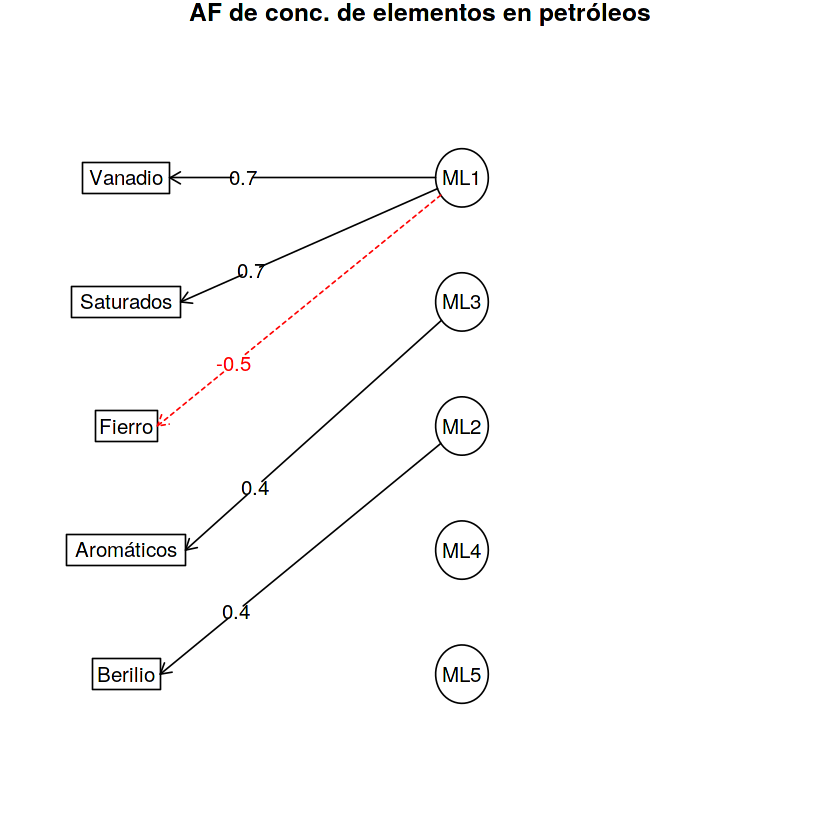

In [14]:
fa.diagram(fa_petroleos, main="AF de conc. de elementos en petróleos")

In [15]:
suppressWarnings(suppressMessages(library(biotools)))

petroleos_filtrado_nvo <- petroleos_escalado #%>%
    #filter(Tipo != tipo_omitido)
tipo_grp_petroleos <- petroleos_filtrado_nvo$Tipo
petroleos_filtrado_nvo<-petroleos_filtrado_nvo[,-c(2,4,5,6)]
boxM(data=petroleos_filtrado_nvo,group=tipo_grp_petroleos)

---
biotools version 3.1



	Box's M-test for Homogeneity of Covariance Matrices

data:  petroleos_filtrado_nvo
Chi-Sq (approx.) = 14.933, df = 6, p-value = 0.02079


- $H_0$: $\Sigma_1 = \Sigma_2 = ... = \Sigma_n$ $i.e$ La matriz de covarianza de las k poblaciones o grupos son todas iguales
- $H_1$: $\Sigma_1 \ne \Sigma_2 \ne ... \ne \Sigma_n$  la matriz de covarianza de las k poblaciones o grupos NO son todas iguales.

_Después de comparar el pvalue arrojado por la prueba con el nivel de significancia de 0.10 se concluye que hay suficiente evidencia estadística para no aceptar la afirmación de que las matrices de covarianza de los grupos son iguales._

4) Describa el procedimiento seguido para aplicar la técnica multivariada de Análisis Discriminante y proporcione la conclusión a la que llegó después de este análisis.

¿Considera que la “regla” de discriminación encontrada es adecuada para ser utilizada por los técnicos del gobierno?

Recuerde justificar las decisiones que toma durante el proceso de análisis.

In [16]:
library(MASS)

petroleos_filtrado_nvo$Tipo<-tipo_grp_petroleos

# creamos el modelo
lda_petroleos <- lda(
    formula = Tipo ~ Vanadio + Berilio,
    data=petroleos_filtrado_nvo
)

#attributes(lda_exp_ingreso)
lda_petroleos

Call:
lda(Tipo ~ Vanadio + Berilio, data = petroleos_filtrado_nvo)

Prior probabilities of groups:
        1         2         3 
0.1250000 0.1964286 0.6785714 

Group means:
     Vanadio    Berilio
1 -1.2175813 -0.4764551
2 -0.7156295 -0.6197564
3  0.4314472  0.2671712

Coefficients of linear discriminants:
              LD1        LD2
Vanadio 1.1841271 -0.5384366
Berilio 0.5757928  0.9113117

Proportion of trace:
  LD1   LD2 
0.987 0.013 

In [17]:
lda_petroleos_pred <- predict(lda_petroleos)
as.matrix(ftable(lda_petroleos_pred$class))

1,2,3
2,12,42


_De lo anterior, vemos que nuestro modelo clasificó 2 combinaciones en el grupo 1, 12 combinaciones de elementos en el tipo 2, y 42 en el tipo 3._

In [18]:
matriz_confusion<-as.matrix(
    table(
            "Clase Real"=petroleos_filtrado_nvo$Tipo,
            "Clase Predicha"=lda_petroleos_pred$class
    )
)
matriz_confusion

          Clase Predicha
Clase Real  1  2  3
         1  0  6  1
         2  1  6  4
         3  1  0 37

_Vemos que hubo falsos positivos en la predicción de tipos_ 🙄

Después de esto, evaluamos la precisión de nuestro modelo:

In [19]:
library(caret)

# data = predicted
# reference = real
conf_resultado<-confusionMatrix(
    data=lda_petroleos_pred$class,
    reference = as.factor(petroleos_filtrado_nvo$Tipo)
)
as.data.frame(conf_resultado$overall)

,conf_resultado$overall
,<dbl>
Accuracy,0.76785714
Kappa,0.47776184
AccuracyLower,0.63581575
AccuracyUpper,0.87020797
AccuracyNull,0.67857143
AccuracyPValue,0.09655385
McnemarPValue,0.05575127


_De lo anterior, vemos que el modelo creado tiene el 76.79% de precisión._

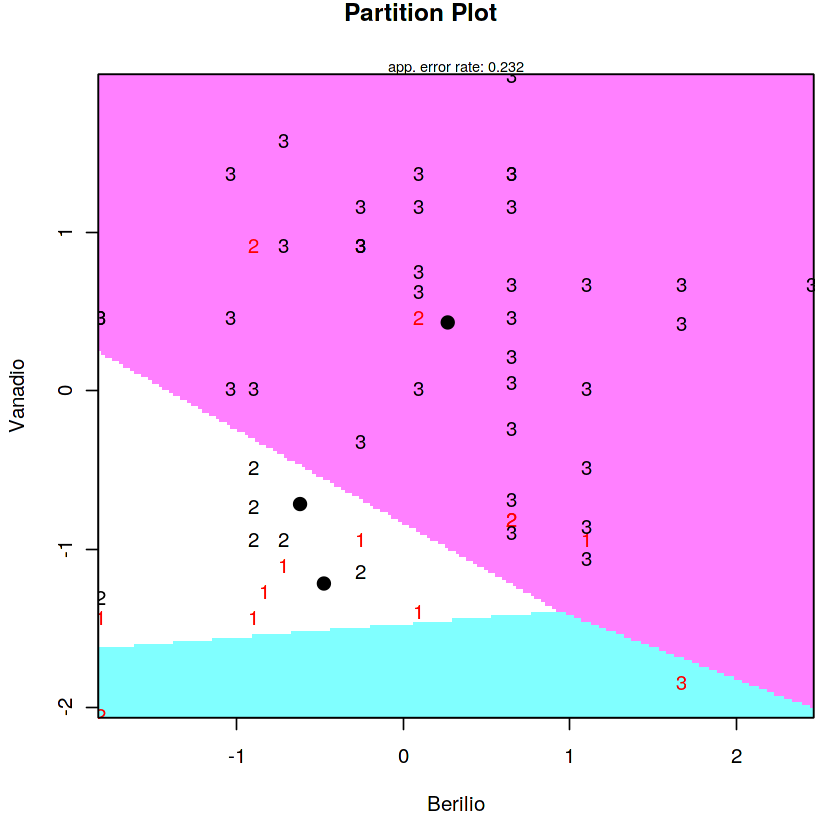

In [20]:
library(klaR)

petroleos_filtrado_nvo$Tipo <- factor(petroleos_filtrado_nvo$Tipo)
partimat(
    Tipo ~ Vanadio + Berilio,
    data=petroleos_filtrado_nvo,
    method="lda",
    prec=200,
    name=c("Vanadio", "Berilio")
)

_En el gráfico anterior vemos que hay varios elementos mal clasificados, existiendo una superposición considerable_

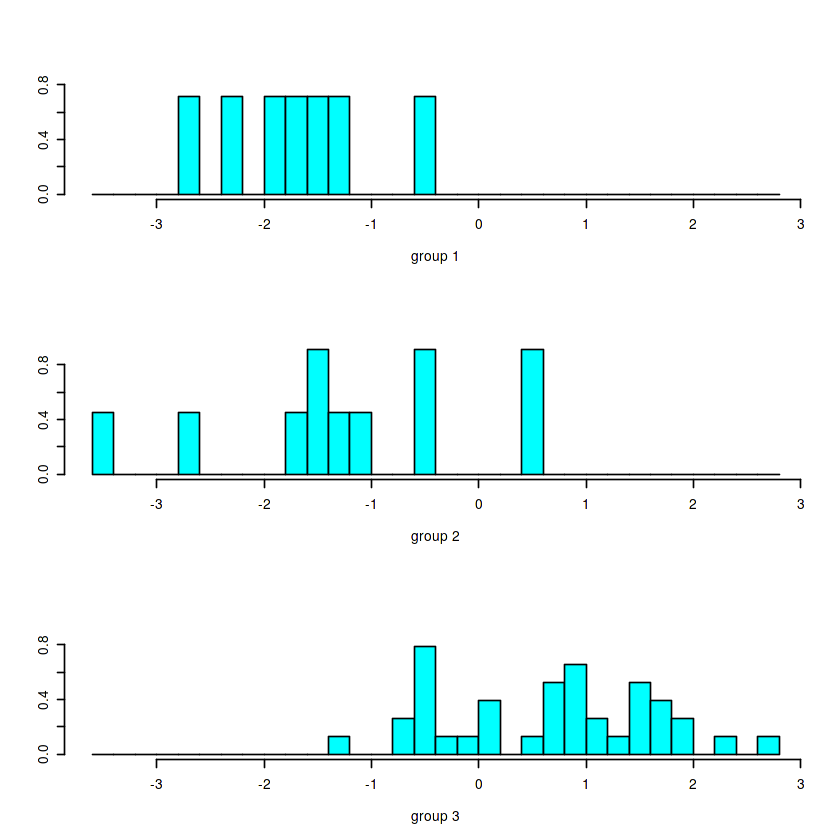

In [21]:
ldahist(data=lda_petroleos_pred$x[,1], g=petroleos_filtrado_nvo$Tipo)

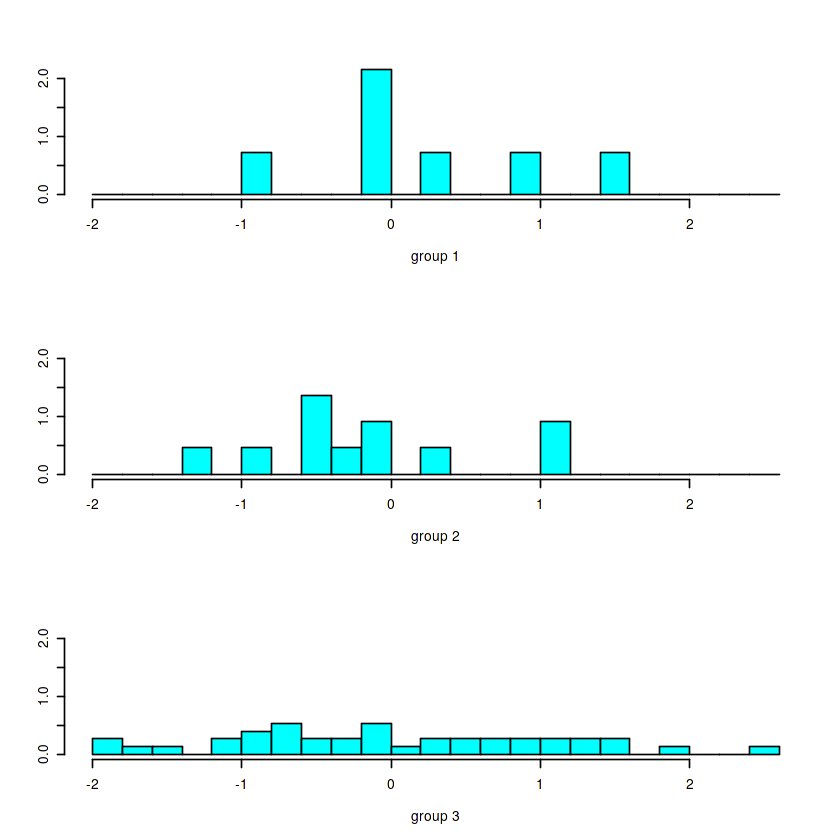

In [22]:
ldahist(data=lda_petroleos_pred$x[,2], g=petroleos_filtrado_nvo$Tipo)

_Vemos que no hay una línea clara de corte por medio de las variables y es por eso que se tienen tantos falsos positivos/negativos._

_Si bien el modelo no tiene tan mala precisión, a comparación de digamos la magia negra, se recomienda que el modelo generado sea usado con precaución y preferentemente junto con otra herramienta. En el peor de los casos, se recomienda agregar más elementos a la clasificación para ver si de esa manera mejora el modelo clasificador._

5) Los ingenieros han obtenido muestras de tres sitios con las características que se muestran en la tabla de más abajo y desean saber a qué tipo de crudo pertenecen ¿qué es lo que dice el modelo?. Comente al respecto.

| x         | Vanadio | Fierro | Berilio | Saturados | Aromaticos |
|-----------|---------|--------|---------|-----------|------------|
| Muestra 1 | 5.2     | 3.77   | 0.62    | 0.245     | 7.72       |
| Muestra 2 | 3.3     | 1.25   | 0.17    | 0.125     | 12.1       |
| Muestra 3 | 8.1     | 3.55   | 0.72    | 0.2       | 5.089      |

In [23]:
nvos_datos <- data.frame(
    Vanadio=c(5.2, 3.3, 8.1),
    #Fierro=c(3.77, 1.25, 3.55),
    Berilio=c(0.62, 0.17, 0.72)
    #Saturados=c(0.245, 0.125, 0.2),
    #Aromaticos=c(7.72, 12.1, 5.089)
)

predict(object=lda_petroleos, newdata=nvos_datos)$posterior

1,2,3
5.905644e-09,1.358426e-06,0.9999986
2.638639e-06,1.314327e-04,0.9998659
1.063720e-12,2.634740e-09,1.0000000


_De lo anterior, vemos que el modelo básicamente clasificó las tres nuevas muestras dentro del tipo 3_